<a href="https://colab.research.google.com/github/AishlyManglani/Data-Mining-Assignments/blob/main/dimensionality%20reduction/tabular_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
import umap
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

In [3]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target



In [4]:
# Apply dimensionality reduction techniques
def tabular_plot(X, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_iris, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

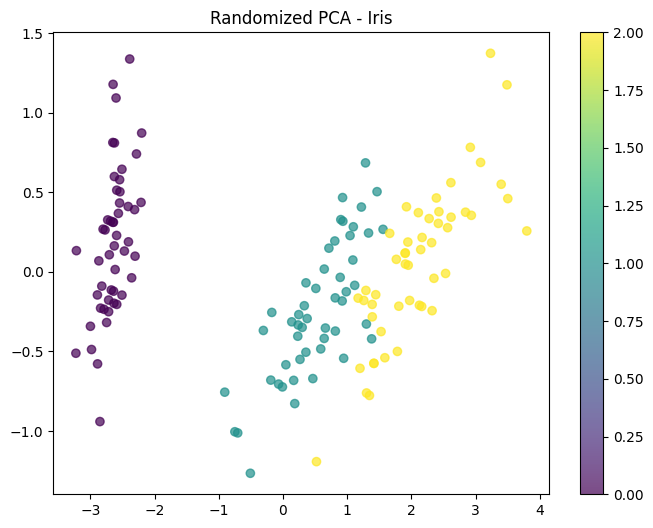

In [5]:
# Randomized PCA
X_pca_rand = PCA(n_components=2, svd_solver='randomized').fit_transform(X_iris)
tabular_plot(X_pca_rand, "Randomized PCA - Iris")

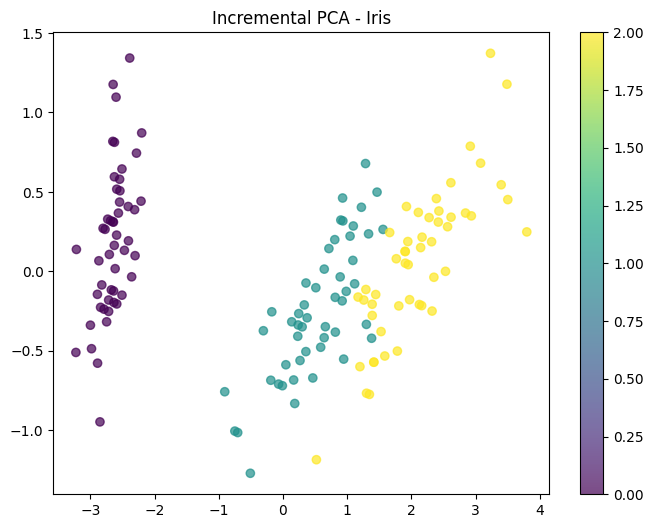

In [6]:

# Incremental PCA
X_ipca = IncrementalPCA(n_components=2).fit_transform(X_iris)
tabular_plot(X_ipca, "Incremental PCA - Iris")

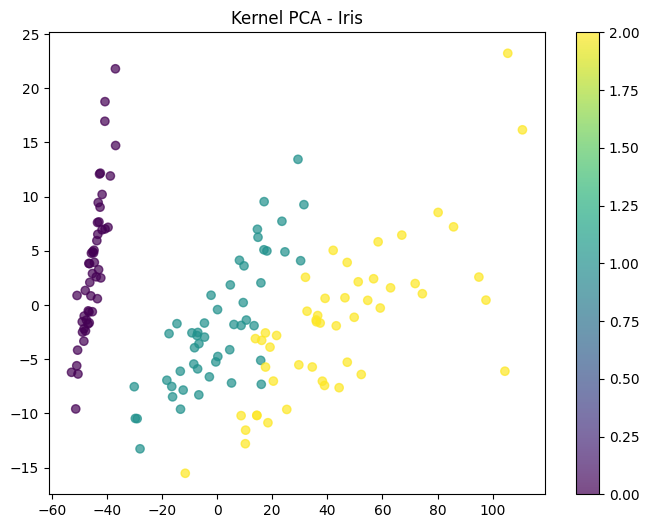

In [7]:
# Kernel PCA
X_kpca = KernelPCA(n_components=2, kernel='poly').fit_transform(X_iris)
tabular_plot(X_kpca, "Kernel PCA - Iris")


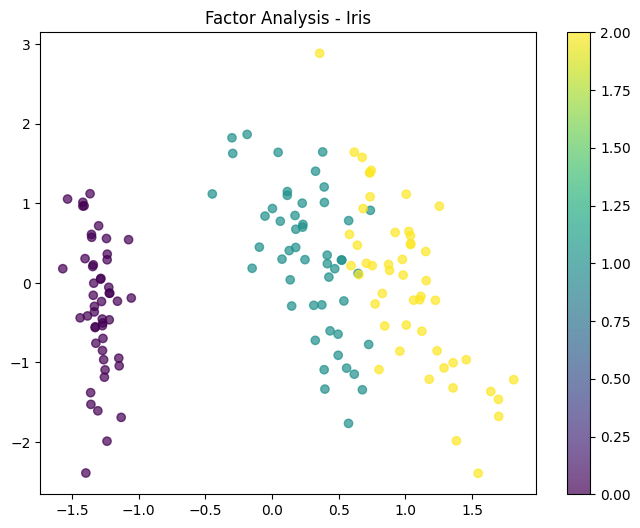

In [8]:
# Factor Analysis
X_fa = FactorAnalysis(n_components=2).fit_transform(X_iris)
tabular_plot(X_fa, "Factor Analysis - Iris")

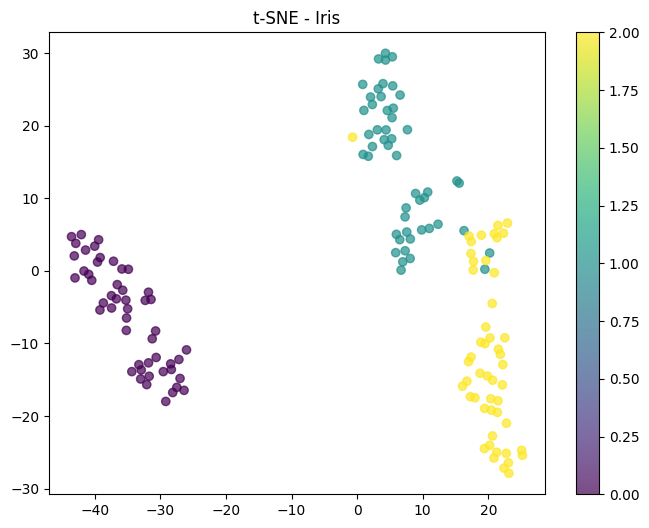

In [9]:

# t-SNE
X_tsne = TSNE(n_components=2, perplexity=10).fit_transform(X_iris)
tabular_plot(X_tsne, "t-SNE - Iris")

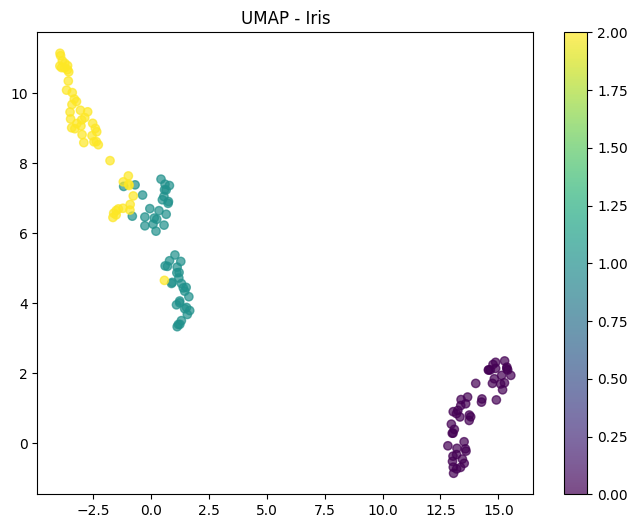

In [10]:
# UMAP
X_umap = umap.UMAP(n_components=2).fit_transform(X_iris)
tabular_plot(X_umap, "UMAP - Iris")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


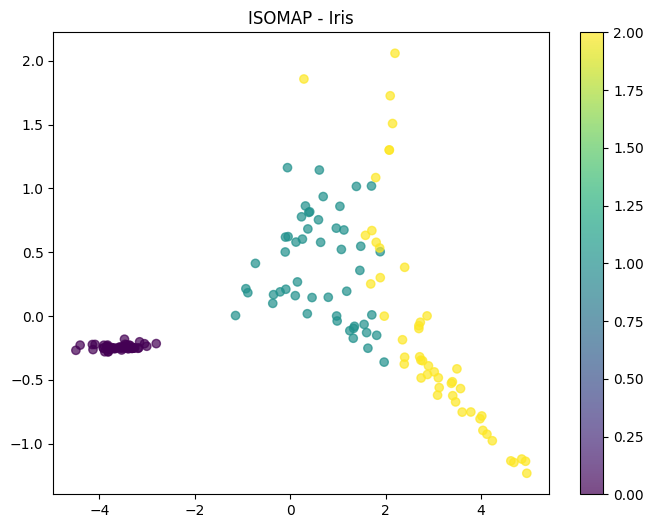

In [11]:

# ISOMAP
X_isomap = Isomap(n_components=2).fit_transform(X_iris)
tabular_plot(X_isomap, "ISOMAP - Iris")

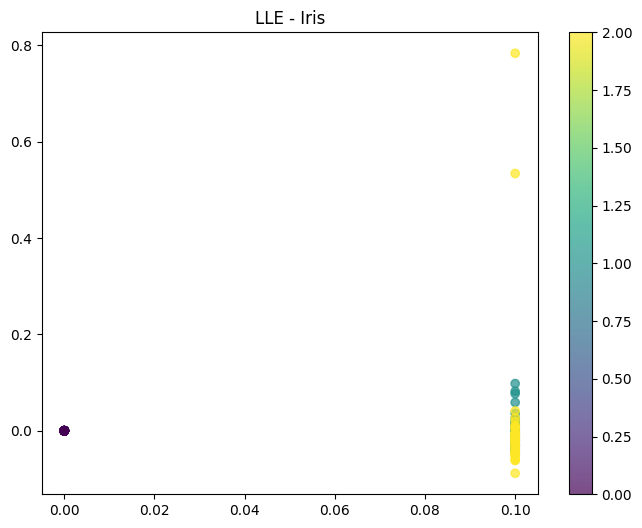

In [12]:

# LLE
X_lle = LocallyLinearEmbedding(n_components=2).fit_transform(X_iris)
tabular_plot(X_lle, "LLE - Iris")

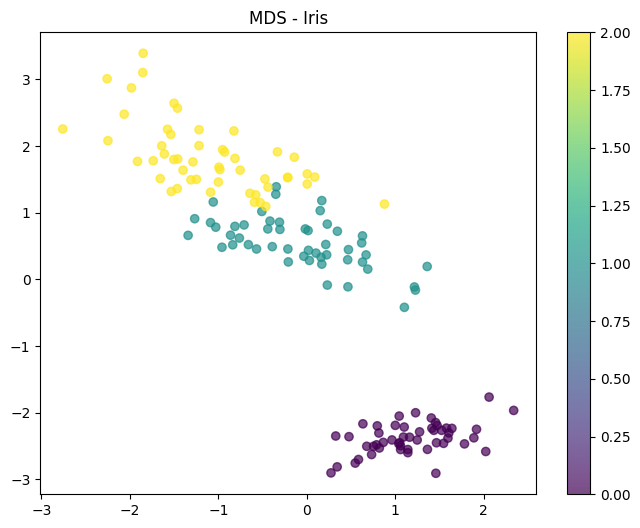

In [13]:
# MDS
X_mds = MDS(n_components=2).fit_transform(X_iris)
tabular_plot(X_mds, "MDS - Iris")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


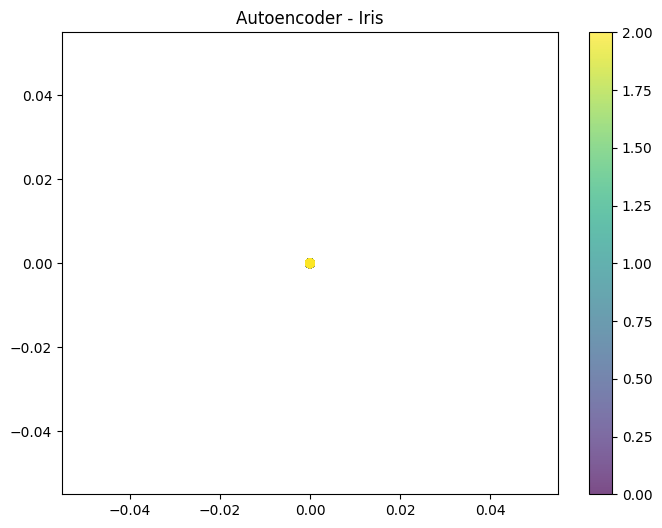

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the autoencoder architecture using the functional API
input_dim = X_iris.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
bottleneck = Dense(2, activation='relu', name='encoder_layer')(encoded)
decoded = Dense(8, activation='relu')(bottleneck)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

# Build and compile the autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_iris, X_iris, epochs=50, batch_size=16, verbose=0)

# Extract the encoder model
encoder = Model(inputs=input_layer, outputs=bottleneck)

# Transform the data using the encoder
X_auto = encoder.predict(X_iris)

# Plot the results
tabular_plot(X_auto, "Autoencoder - Iris")

